# DSE 220 Homework 1

### Load Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Part 1 - Data Preprocessing
### Question 1: 

Remove the rows with missing labels (’class’) and rows with more than 7 missing features. Report the remaining number of rows. (1 mark)


In [2]:
# Load Data
wine = pd.read_csv('./wine_modified.csv')

# Remove the rows with missing labels.
label_filtered_wine = wine.dropna(subset=['class'])

# Remove the rows with more than 7 missing features.(7 Non-NaN: 13 features - 7 missing featues + 1 class label)
NaN_filtered_wine = label_filtered_wine.dropna(thresh=7)

print('The remaining number of rows:',NaN_filtered_wine.shape[0])

The remaining number of rows: 154


### Question 2: 

Remove features with > 50% of missing values. For other features with missing values fill them with the mean of the corresponding features. Report the removed features (if any) and standard deviation of features with missing values after filling. (2 marks)

In [3]:
# Get columns
columns = wine.columns.tolist()

# Remove features with > 50% of missing values.
feature_filtered_wine = NaN_filtered_wine.dropna(axis=1, thresh = wine.shape[0]/2)
filtered_columns = feature_filtered_wine.columns.tolist()
removed_columns = [item for item in columns if item not in filtered_columns]
print('Removed features:',removed_columns)


Removed features: ['Ash']


In [4]:
# Fill missing values with mean.
filling_wine = feature_filtered_wine.fillna(feature_filtered_wine.mean())
print('Standard deviation of features with missing values after filling:\n\n',filling_wine.iloc[:,1:].std())

Standard deviation of features with missing values after filling:

 Alcohol                   3.804067
Malic acid                1.116005
Alcalinity of ash         3.456794
Magnesium                14.440377
Total phenols             0.617237
Flavanoids                0.873573
Nonflavanoid phenols      0.127083
Proanthocyanins           0.587671
Color intensity           2.325204
Hue                       0.229412
OD280/OD315               0.723261
Proline                 303.033368
dtype: float64


### Question 3: 

Detect and remove rows with any outliers/incorrect values in features ’alcohol’ and ’proline’ (if any). Clearly state the basis of your removal. (1 mark)

In [5]:
# Get mean and std for the features.
sigma = filling_wine.iloc[:,1:].std().to_dict() # sigma{feature:std ...}
mu = filling_wine.iloc[:,1:].mean().to_dict() # mu{feature:mean ...}

# Remove the rows with outlier(1 std from the mean) values in features 'Alcohol' and 'Proline'. 
features = ['Alcohol','Proline']
filtered_wine = filling_wine
for feature in ['Alcohol','Proline']:
    filtered_wine = filtered_wine[(filtered_wine[feature] < mu[feature]+sigma[feature]) &
                                  (filtered_wine[feature] > mu[feature]-sigma[feature])]
    print('Numnber of remaining rows after removing outliers of {}: {}'.format(feature,filtered_wine.shape[0]))

Numnber of remaining rows after removing outliers of Alcohol: 149
Numnber of remaining rows after removing outliers of Proline: 98


## Part 2 - Decision Trees
### Question 4: 

Train Decision Tree model on train data for criterions = {’gini’, ’entropy’} and report the accuracies on the validation data. Select the best criterion and report the accuracy on the test data. (1 mark)

In [6]:
# Load datasets.
X_train = pd.read_csv('./wine_train_data.csv')
X_valid = pd.read_csv('./wine_val_data.csv')
X_test = pd.read_csv('./wine_test_data.csv')

y_train = np.loadtxt('./wine_train_labels.csv',delimiter=',',skiprows=1)
y_valid = np.loadtxt('./wine_val_labels.csv',delimiter=',',skiprows=1)
y_test = np.loadtxt('./wine_test_labels.csv',delimiter=',',skiprows=1)

# Get 'train+validataion' data.
X = pd.concat([X_train,X_valid])
y = np.append(y_train,y_valid)

In [20]:
# Train Decision Tree model on train dataset.
creterions=['gini','entropy']
for creterion in creterions:
    clf = DecisionTreeClassifier(criterion=creterion)
    clf.fit(X_train, y_train)

    # Fit model on validation dataset.
    y_pred_valid = clf.predict(X_valid)
    accuracy = np.sum(y_pred_valid == y_valid)/len(y_valid)
    print('Validation accuracy(creterion={}):{}'.format(creterion,accuracy)) 

Validation accuracy(creterion=gini):0.9743589743589743
Validation accuracy(creterion=entropy):0.9487179487179487


In [24]:
# Select criterion as 'entropy', train model on 'train + validataon' dataset.
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Fit model on test dataset.
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test)/len(y_test)
print('Test accuracy:',accuracy)

Test accuracy: 0.8205128205128205


### Question 5: 

Use the criterion selected above to train Decision Tree model on train data for min samples split={2,5,10,20} and report the accuracies on the validation data. Select the best parameter and report the accuracy on the test data. (2 marks)

In [36]:
# Train Decision Tree model on train dataset.
min_samples_split=[2,5,10,20]
for i in min_samples_split:
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=i)
    clf.fit(X_train, y_train)

    # Fit model on validation dataset.
    y_pred_valid = clf.predict(X_valid)
    accuracy = np.sum(y_pred_valid == y_valid)/len(y_valid)
    print('Validation accuracy(min_samples_split={}):{}'.format(i,accuracy))
   

Validation accuracy(min_samples_split=2):0.9743589743589743
Validation accuracy(min_samples_split=5):0.9487179487179487
Validation accuracy(min_samples_split=10):0.9230769230769231
Validation accuracy(min_samples_split=20):0.9230769230769231


In [37]:
# Select 'min_samples_split' as 2, then train model on 'train+validation' dataset.
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
clf.fit(X, y)

# Fit model on test dataset.
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test)/len(y_test)
print('Test accuracy:',accuracy)

Test accuracy: 0.8205128205128205


### Question 6: 

Use the parameters selected above (Q4 and Q5) to train Decision Tree model using the first 20, 40, 60, 80 and 100 samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. (2 marks)

Validation accuracy(train_samples=20):0.6153846153846154
Validation accuracy(train_samples=40):0.8461538461538461
Validation accuracy(train_samples=60):0.8717948717948718
Validation accuracy(train_samples=80):0.8974358974358975
Validation accuracy(train_samples=100):0.9743589743589743


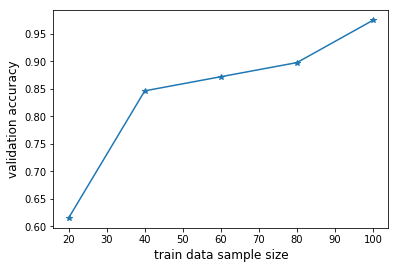

In [39]:
samples=[20,40,60,80,100]
accuracies=[]
for num in samples:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
    clf.fit(X_train[:num],y_train[:num])
    
    # Fit model on validation dataset.
    y_pred_valid = clf.predict(X_valid)
    accuracy = np.sum(y_pred_valid == y_valid)/len(y_valid)
    accuracies.append(accuracy)
    print('Validation accuracy(train_samples={}):{}'.format(num,accuracy))

# Plot the accuracies on validation dataset.
plt.plot(samples,accuracies,'*-')
plt.xlabel('train data sample size',fontsize=12)
plt.ylabel('validation accuracy',fontsize=12)
plt.show()

## Part 3 - Nearest Neighbor
**Normalize Data**: Normalize features such that for each feature the mean is 0 and the standard deviation is 1 in the train+validation data. Use the normalizing factors calculated on train+validation data to modify the values in train, validation and test data.

In [40]:
# Normalize features on 'tran+validation' dataset.
scaler = StandardScaler()
scaler.fit(X)

# Get normalized train, validation,test data.
X = scaler.transform(X)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Question 7: 

Train k-nn model on train + validation data and report accuracy on test data. Use Euclidean distance and k=3. (1 mark)


In [41]:
# Train k-nn model on 'train+validation' dataset.
clf = KNeighborsClassifier(n_neighbors=3,p=2)
clf.fit(X, y)

# Fit model on test dataset and get accuracy.
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test)/len(y_test)
print('Test accuracy (k=3):',accuracy)

Test accuracy (k=3): 0.8717948717948718


### Question 8: 

Train the model on train data for distance metrics defined by $l_{1}, l_{inf}, l_{2}$. Report the accuracies on the validation data. Select the best metric and report the accuracy on the test data for the selected metric. Use k=3. (1 mark)


In [42]:
# Define diffent metrics distance. 
metrics = ['manhattan','chebyshev','euclidean']

for metric in metrics:
    
    # Train model on train dataset.
    clf = KNeighborsClassifier(n_neighbors=3,metric=metric)
    clf.fit(X_train,y_train)
     
    # Fit model on valid dataset and get the accuracy.
    y_pred_valid = clf.predict(X_valid)
    accuracy = np.sum(y_pred_valid == y_valid)/(len(y_valid))
    print('Vadlidation accuracy(metric={}):{}'.format(metric,accuracy))

Vadlidation accuracy(metric=manhattan):0.9487179487179487
Vadlidation accuracy(metric=chebyshev):0.9230769230769231
Vadlidation accuracy(metric=euclidean):0.9230769230769231


In [43]:
# Select materic as 'manhattan distance'.
# Train model on 'train+validation' dataset.
clf = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
clf.fit(X,y)

# Fit model on test dataset.
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test)/len(y_test)
print('Test accuracy (k=3, manhattan distance):',accuracy)

Test accuracy (k=3, manhattan distance): 0.9743589743589743


### Question 9: 

Train the k-nn model on train data for k=1,3,5,7,9. Report and plot the accuracies on the validation data. Select the best ’k’ value and report the accuracy on the test data for the selected ’k’. Use Euclidean distance. (2 marks)



Validation accuracy(k=1):0.9487179487179487
Validation accuracy(k=3):0.9230769230769231
Validation accuracy(k=5):0.9487179487179487
Validation accuracy(k=7):0.9743589743589743
Validation accuracy(k=9):0.9487179487179487


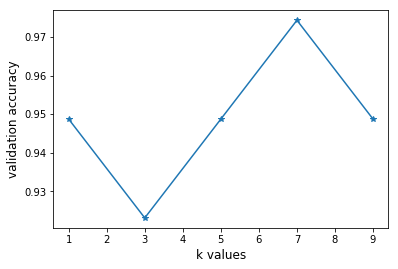

In [46]:
# Define diffent k values.
k_values=[1,3,5,7,9]
accuracies=[]
for k in k_values:
    # Train diffent k value model on train data.
    clf=KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    
    # Fit model on validation data.
    y_pred_valid = clf.predict(X_valid)
    accuracy = np.sum(y_pred_valid == y_valid)/len(y_valid)
    accuracies.append(accuracy)
    print('Validation accuracy(k={}):{}'.format(k,accuracy))

# Plot the accuracies on validation dataset.
plt.plot(k_values,accuracies,'*-')
plt.xlabel('k values',fontsize=12)
plt.ylabel('validation accuracy',fontsize=12)
plt.show()

In [47]:
# Select k value as 7, and train the model on 'train+validation' dataset.
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X,y)

# Fit model on test dataset.
y_pred_test = clf.predict(X_test)
accuracy = np.sum(y_pred_test == y_test)/len(y_test)
print('Test accuracy (k=7, Eucidean distance):',accuracy)

Test accuracy (k=7, Eucidean distance): 0.9230769230769231


### Question 10:

Instead of using full train data, train the model using the first 20, 40, 60, 80 and 100 data samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. Use Euclidean distance and k=3. Note: Don’t shuffle the data and use only the ’first n samples’, otherwise your answers may differ. (2 marks)

validation accuracy (train samples = 20): 0.9487179487179487 
validation accuracy (train samples = 40): 1.0 
validation accuracy (train samples = 60): 1.0 
validation accuracy (train samples = 80): 1.0 
validation accuracy (train samples = 100): 0.9230769230769231 


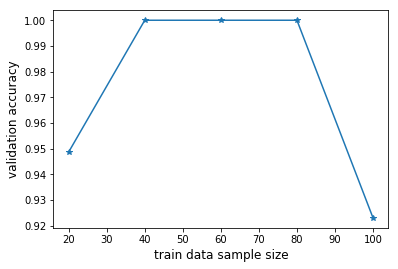

In [48]:
samples=[20,40,60,80,100]
accuracies=[]
for num in samples:
    # Train model on different sizes train dataset.
    clf=KNeighborsClassifier(n_neighbors=3,p=2)
    clf.fit(X_train[:num],y_train[:num])
    
    # Fit model on validation dataset.
    predictions = clf.predict(X_valid)
    accuracy = np.sum(predictions == y_valid)/len(y_valid)
    accuracies.append(accuracy)
    print('validation accuracy (train samples = {}): {} '.format(num,accuracy))

# Plot the accuracies on validation dataset.
plt.plot(samples,accuracies,'*-')
plt.xlabel('train data sample size',fontsize=12)
plt.ylabel('validation accuracy',fontsize=12)
plt.show()

